In [54]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import datetime
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 500)
from __future__ import print_function
import math
import csv
import glob

# visualization
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm

#sentiment analysis
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# download stop words
#nltk.download('stopwords')
# display stopwords
#np.array(stop)

In [2]:
# encoding='utf-8'
# encoding = "ISO-8859-1",
# error_bad_lines=False,
tweet_df = pd.read_csv('data/btc_tweets_1418244_unique.csv', 
                       encoding='utf-8',
                       header=0, 
                       engine='python',
                       error_bad_lines=False,
                       usecols=[0,1,2,3,4,5])

In [35]:
tweet_df = pd.read_csv('data/output_2018-11-11-to-2014-12-31-1000-perdate.csv', 
                       encoding='utf-8',
                       header=0, 
                       engine='python',
                       error_bad_lines=False,
                       usecols=[0,1,2,3,4])

Skipping line 21: ',' expected after '"'
Skipping line 70: ',' expected after '"'
Skipping line 135: ',' expected after '"'
Skipping line 161: ',' expected after '"'
Skipping line 252: ',' expected after '"'
Skipping line 265: ',' expected after '"'
Skipping line 268: ',' expected after '"'
Skipping line 348: ',' expected after '"'
Skipping line 351: ',' expected after '"'
Skipping line 371: ',' expected after '"'
Skipping line 477: ',' expected after '"'
Skipping line 624: ',' expected after '"'
Skipping line 642: ',' expected after '"'
Skipping line 658: ',' expected after '"'
Skipping line 663: ',' expected after '"'
Skipping line 668: ',' expected after '"'
Skipping line 675: ',' expected after '"'
Skipping line 733: ',' expected after '"'
Skipping line 764: ',' expected after '"'
Skipping line 770: ',' expected after '"'
Skipping line 773: ',' expected after '"'
Skipping line 774: ',' expected after '"'
Skipping line 806: ',' expected after '"'
Skipping line 812: ',' expected afte

In [36]:
tweet_df.describe()

,date,text,id,permalink
count,417327,417251,417327,417327
unique,331996,378000,417325,417327
top,2017-12-05 18:57:49,START BITCOIN MINING http:// bowwellebay.blog....,print on art paper,https://twitter.com/DeadFishCrypto/status/9555...
freq,34,634,3,1


In [37]:
tweet_df = tweet_df.rename(columns={"date":"date_time"})
tweet_df.head()

,date_time,text,id,permalink
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...


In [38]:
# check for NAN's in date_time
print('Total null prices: %s' % tweet_df['date_time'].isnull().sum())

Total null prices: 0


In [39]:
# select row with NAN's in Close price
tweet_df[tweet_df['date_time'].isnull()]

,date_time,text,id,permalink


In [40]:
# if NAN's then drop them
tweet_df = tweet_df.dropna(subset=['date_time'])

In [41]:
# modify date-time column 
tweet_df["date"] = pd.to_datetime(tweet_df["date_time"], errors='coerce').dt.strftime('%Y-%m-%d')
tweet_df.head()

,date_time,text,id,permalink,date
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,2018-11-12
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,2018-11-12
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,2018-11-12
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,2018-11-12
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...,2018-11-12


In [8]:
# re-order column headers
tweet_df = tweet_df[['date', 'date_time', 'id', 'permalink', 'permalink_uid', 'username', 'text']]
tweet_df.head()

,date,date_time,id,permalink,permalink_uid,username,text
0,2017-12-25,12/25/2017 11:00,9.45E+17,https://twitter.com/wampei/status/945323495235...,945323495235481600,wampei,#Bitcoin Is Already Bouncing Back After the Bi...
1,2017-12-25,12/25/2017 11:00,9.45E+17,https://twitter.com/cryptosbuy/status/94532349...,945323493079617536,cryptosbuy,bitcoin $ BTCUSD http://www. tradingview.com/c...
2,2017-12-25,12/25/2017 11:00,9.45E+17,https://twitter.com/CDS_news/status/9453234918...,945323491817082881,CDS_news,Tire suas dúvidas sobre Bitcoin http:// ow.ly/...
4,2017-12-25,12/25/2017 11:00,9.45E+17,https://twitter.com/SatoshiPoint/status/945323...,945323481411047426,SatoshiPoint,Five Reasons #Bitcoin Will Be Your Best High-G...
5,2017-12-25,12/25/2017 11:00,9.45E+17,https://twitter.com/CityofInvestmnt/status/945...,945323480744112129,CityofInvestmnt,#الفوركس #форекс #外汇 #外匯 #Forex #تحليل_فني #فو...


### Tweet Analysis

In [42]:
tweet_df['text'] = tweet_df['text'].astype(str)

In [43]:
# number of characters in each tweet
tweet_df['tweet_len'] =  tweet_df['text'].apply(len)
tweet_df['tweet_len'].describe()

count   417327.0
mean       152.5
std         75.6
min          1.0
25%        100.0
50%        136.0
75%        198.0
max       1613.0
Name: tweet_len, dtype: float64

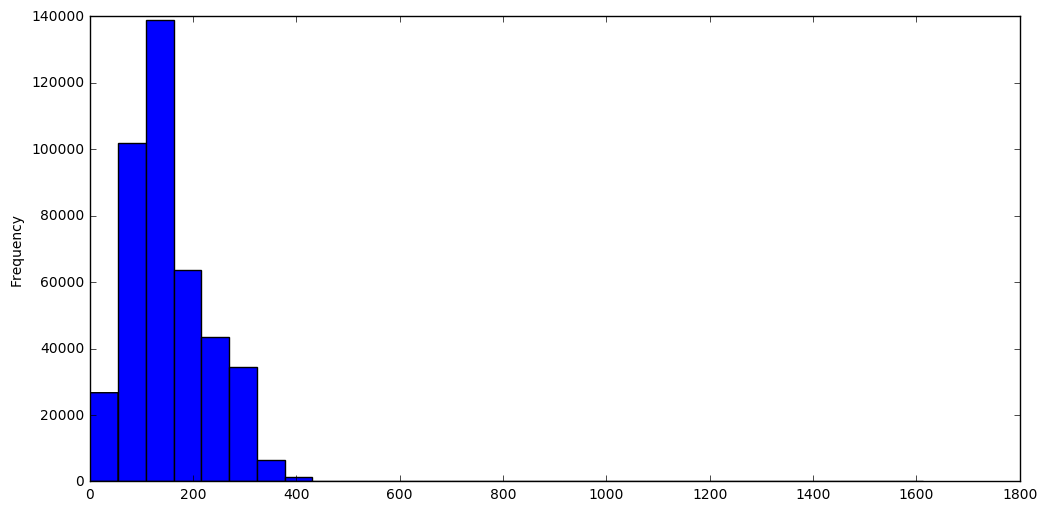

In [44]:
tweet_df['tweet_len'].plot(kind='hist', bins=30, figsize=(12,6))
plt.show()

In [48]:
tweet_df = tweet_df.drop(tweet_df[tweet_df['tweet_len'] > 300].index)


In [49]:
tweet_df['tweet_len'].describe()

count   400123.0
mean       144.8
std         66.2
min          1.0
25%         99.0
50%        134.0
75%        186.0
max        300.0
Name: tweet_len, dtype: float64

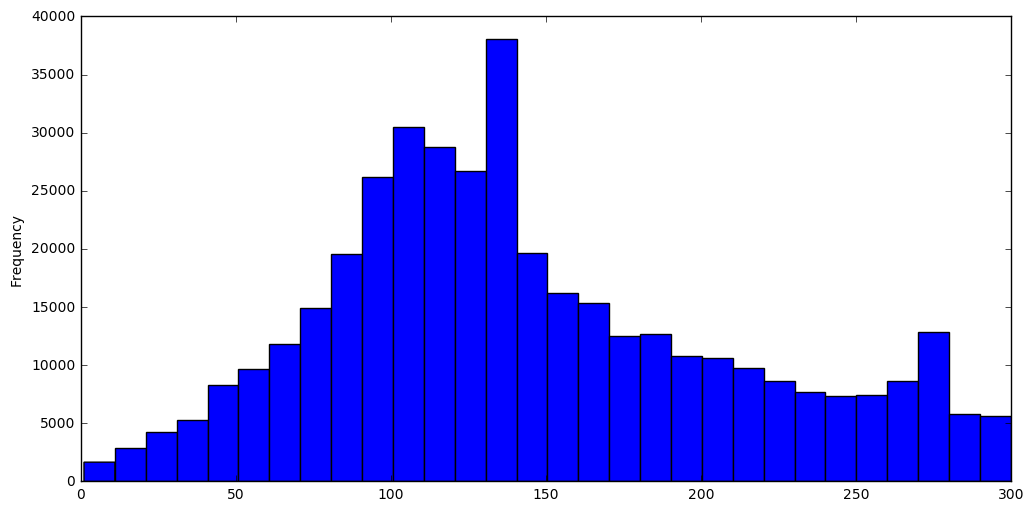

In [50]:
tweet_df['tweet_len'].plot(kind='hist', bins=30, figsize=(12,6))
plt.show()

In [41]:
#tweet_df[tweet_df['tweet_len'] > 179]['text_cleaned']
#tweet_df[tweet_df['tweet_len'] > 1000]['text_cleaned']
# view entire tweet
#tweet_df[tweet_df['tweet_len'] > 179]['text_cleaned'].iloc[223657]
#tweet_df[tweet_df['tweet_len'] > 10000]['text_cleaned'].iloc[223657]

125331    come back prize turkey less five minutes i ll ...
127221    bitcoin fb me 44wdne8my 945277661504352256 per...
127881    hemos hablado de tica en tiempos de superviven...
129726    think price bitcoin bubble said israel s chief...
130210    bitcoin banking looked like middle ages here s...
139247    number crypto investors hodlers remains somewh...
158579    money spent bitcoin cash registers nobody went...
187713    kenapa orang ingin bitcoin atau mata uang alte...
188171    can t value bitcoin it s value producing asset...
188611    reach 90 segwit adoption schnorr signatures ma...
191563    reach 90 segwit adoption schnorr signatures ma...
200798    common words use 10 years ago 1 social media 2...
206377    meskipun memiliki banyak kelebihan bitcoin pun...
223657    poker part 2 asian market nut well worth crack...
228596    bitcoin transformative addition internet commu...
251608    bitcoin transactions occur banks settle net tr...
254710    poker bitcoin poker marriage m

### Sentiment Analysis: textblob

In [51]:

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing: stop words, links, special characters using regex.
    Args:
        tweet: DataFrame column 'text'
    Returns:
        
    '''
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = [word for word in tweet.split() if word not in stop]
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(tweet)).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet using textblob.
    Args:
        tweet:
    Returns:
    
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    


In [52]:
tweet_df['text_cleaned'] = tweet_df['text'].apply(clean_tweet)

In [53]:
tweet_df['sentiment_score_textBlob'] = tweet_df['text_cleaned'].apply(analyze_sentiment)

### Sentiment Analysis: vaderSentiment

In [58]:
# https://github.com/Sapphirine/Using-News-to-Predict-Stock-Movement
 
analyser = SentimentIntensityAnalyzer()
def senti_score_udf(sentence):
    snt = analyser.polarity_scores(sentence)
#     return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])
    return (snt['compound'])



In [59]:
tweet_df['sentiment_score_vader'] = tweet_df['text_cleaned'].apply(senti_score_udf)

In [60]:
tweet_df.head()

,date_time,text,id,permalink,date,tweet_len,text_cleaned,sentiment_score_textBlob,sentiment_score_vader
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,2018-11-12,204,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,2018-11-12,273,okay i ll bite blockchain part bitcoin that ch...,1,0.8
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,2018-11-12,216,heard great new currency bolivar fixes bitcoin...,1,0.6
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,2018-11-12,182,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...,2018-11-12,194,unable remember password man sent letter bomb ...,-1,-0.9


In [61]:
# pre-processing to count number of tweets per sentiment type
tweet_df["pos_tweet_textBlob"] = np.where(tweet_df["sentiment_score_textBlob"] > 0, 1, 0)
#tweet_df["neg_sentiment_tweet"] = np.where(tweet_df["sentiment"] < 0, 1, tweet_df["pos_sentiment_tweet"])
tweet_df["neu_tweet_textBlob"] = np.where(tweet_df["sentiment_score_textBlob"] == 0, 1, 0)
tweet_df["neg_tweet_textBlob"] = np.where(tweet_df["sentiment_score_textBlob"] < 0, 1, 0)
tweet_df.head()

,date_time,text,id,permalink,date,tweet_len,text_cleaned,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,2018-11-12,204,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4,0,0,1
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,2018-11-12,273,okay i ll bite blockchain part bitcoin that ch...,1,0.8,1,0,0
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,2018-11-12,216,heard great new currency bolivar fixes bitcoin...,1,0.6,1,0,0
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,2018-11-12,182,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4,0,0,1
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...,2018-11-12,194,unable remember password man sent letter bomb ...,-1,-0.9,0,0,1


In [62]:
# pre-processing to count number of tweets per sentiment type
tweet_df["pos_tweet_vader"] = np.where(tweet_df["sentiment_score_vader"] > 0, 1, 0)
#tweet_df["neg_sentiment_tweet"] = np.where(tweet_df["sentiment"] < 0, 1, tweet_df["pos_sentiment_tweet"])
tweet_df["neu_tweet_vader"] = np.where(tweet_df["sentiment_score_vader"] == 0, 1, 0)
tweet_df["neg_tweet_vader"] = np.where(tweet_df["sentiment_score_vader"] < 0, 1, 0)
tweet_df.head()

,date_time,text,id,permalink,date,tweet_len,text_cleaned,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,2018-11-12,204,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4,0,0,1,1,0,0
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,2018-11-12,273,okay i ll bite blockchain part bitcoin that ch...,1,0.8,1,0,0,1,0,0
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,2018-11-12,216,heard great new currency bolivar fixes bitcoin...,1,0.6,1,0,0,1,0,0
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,2018-11-12,182,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0.4,0,0,1,1,0,0
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...,2018-11-12,194,unable remember password man sent letter bomb ...,-1,-0.9,0,0,1,0,0,1


In [63]:
tweet_df_sumd = tweet_df.groupby(pd.Grouper(key='date', sort=True)).sum()

## Time-series pre-processing

In [64]:
tweet_df_sumd_3day = tweet_df_sumd.rolling(window=3).sum()
tweet_df_sumd_3day.head()

,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader
date,,,,,,,,,
2014-12-02,nan,nan,nan,nan,nan,nan,nan,nan,nan
2014-12-06,nan,nan,nan,nan,nan,nan,nan,nan,nan
2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0
2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0
2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0


In [65]:
tweet_df_sumd_3day.reset_index(level=0, inplace=True)
tweet_df_sumd_3day.head()

,date,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader
0,2014-12-02,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2014-12-06,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0
3,2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0
4,2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0


In [67]:
# if NAN's then drop them
tweet_df_sumd_3day = tweet_df_sumd_3day.dropna()
tweet_df_sumd_3day.head()

,date,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader
2,2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0
3,2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0
4,2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0
5,2014-12-17,11127.0,38.0,25.6,42.0,44.0,4.0,56.0,26.0,8.0
6,2014-12-18,9518.0,28.0,23.1,31.0,44.0,3.0,47.0,20.0,11.0


In [68]:
tweet_df_sumd_3day['pos-neg_textBlob'] = tweet_df_sumd_3day['pos_tweet_textBlob'] - tweet_df_sumd_3day['neg_tweet_textBlob']
tweet_df_sumd_3day.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob
2,2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0,28.0
3,2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0,40.0
4,2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0,40.0
5,2014-12-17,11127.0,38.0,25.6,42.0,44.0,4.0,56.0,26.0,8.0,38.0
6,2014-12-18,9518.0,28.0,23.1,31.0,44.0,3.0,47.0,20.0,11.0,28.0


In [69]:
tweet_df_sumd_3day['pos-neg_vader'] = tweet_df_sumd_3day['pos_tweet_vader'] - tweet_df_sumd_3day['neg_tweet_vader']
tweet_df_sumd_3day.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader
2,2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0,28.0,55.0
3,2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0,40.0,78.0
4,2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0,40.0,76.0
5,2014-12-17,11127.0,38.0,25.6,42.0,44.0,4.0,56.0,26.0,8.0,38.0,48.0
6,2014-12-18,9518.0,28.0,23.1,31.0,44.0,3.0,47.0,20.0,11.0,28.0,36.0


In [70]:
tweet_df_sumd_3day['neg-plus-neu_textBlob'] = tweet_df_sumd_3day['neu_tweet_textBlob'] + tweet_df_sumd_3day['neg_tweet_textBlob']
# tweet_df_sumd_3day.head()

tweet_df_sumd_3day['posNeg-plusNeu_textBlob'] = tweet_df_sumd_3day['pos_tweet_textBlob'] - tweet_df_sumd_3day['neg-plus-neu_textBlob']
# tweet_df_sumd_3day.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [71]:
tweet_df_sumd_3day['neg-plus-neu_vader'] = tweet_df_sumd_3day['neu_tweet_vader'] + tweet_df_sumd_3day['neg_tweet_vader']
# tweet_df_sumd_3day.head()

tweet_df_sumd_3day['posNeg-plusNeu_vader'] = tweet_df_sumd_3day['pos_tweet_vader'] - tweet_df_sumd_3day['neg-plus-neu_vader']
# tweet_df_sumd_3day.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
# 1's for bullish regimes, and 0's for everything else
tweet_df_sumd_3day["signal_textBlob"] = np.where(tweet_df_sumd_3day["posNeg-plusNeu_textBlob"] > 0, 1, 0)

tweet_df_sumd_3day["signal_textBlob"] = np.where(tweet_df_sumd_3day["posNeg-plusNeu_textBlob"] < 0, -1, tweet_df_sumd_3day["signal_textBlob"] )

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
tweet_df_sumd_3day['signal_textBlob'].value_counts() 

-1    992
 1     37
 0      1
Name: signal_textBlob, dtype: int64

In [74]:
# 1's for bullish regimes, and 0's for everything else
tweet_df_sumd_3day["signal_vader"] = np.where(tweet_df_sumd_3day["posNeg-plusNeu_vader"] > 0, 1, 0)

tweet_df_sumd_3day["signal_vader"] = np.where(tweet_df_sumd_3day["posNeg-plusNeu_vader"] < 0, -1, tweet_df_sumd_3day["signal_vader"] )

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
tweet_df_sumd_3day.head()

,date,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
2,2014-12-08,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0,28.0,55.0,86.0,-30.0,64.0,14.0,-1,1
3,2014-12-10,19317.0,40.0,45.8,67.0,70.0,27.0,99.0,44.0,21.0,40.0,78.0,97.0,-30.0,65.0,34.0,-1,1
4,2014-12-13,19467.0,40.0,43.4,67.0,71.0,27.0,97.0,47.0,21.0,40.0,76.0,98.0,-31.0,68.0,29.0,-1,1
5,2014-12-17,11127.0,38.0,25.6,42.0,44.0,4.0,56.0,26.0,8.0,38.0,48.0,48.0,-6.0,34.0,22.0,-1,1
6,2014-12-18,9518.0,28.0,23.1,31.0,44.0,3.0,47.0,20.0,11.0,28.0,36.0,47.0,-16.0,31.0,16.0,-1,1


In [54]:
tweet_df_sumd_3day.to_csv('data/processed_tweet_data.csv')

In [33]:
len(tweet_df_sumd_3day)

1042

In [76]:
len(tweet_df_sumd_3day)

1030

In [77]:
tweet_df_sumd_3day.to_csv('data/processed_tweet_data_1030-rows.csv')

In [34]:
tweet_df_sumd_3day.to_csv('data/processed_tweet_data_1042-rows.csv')

In [ ]:
# https://github.com/harishpuvvada/BitCoin-Value-Predictor

# Textblob code
# from textblob import TextBlob  #passing cleaned tweets and getting a sentiment score for each tweet
# from textblob.sentiments import NaiveBayesAnalyzer
# def senti_score_udf(input_str):
#     PSanalysis = TextBlob(input_str)
#     analysis = TextBlob(input_str,analyzer=NaiveBayesAnalyzer())
#     polarity = PSanalysis.sentiment.polarity
#     subjectivity = PSanalysis.sentiment.subjectivity
#     classification = analysis.sentiment.classification
#     p_pos = analysis.sentiment.p_pos
#     p_neg = analysis.sentiment.p_neg
#     return [polarity,subjectivity,classification,p_pos,p_neg] #subjectivity, polarity, p_neg, classification

In [ ]:
### Sentiment Analysis: vaderSentiment
# https://github.com/Sapphirine/Using-News-to-Predict-Stock-Movement
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def senti_score_udf(sentence):
    snt = analyser.polarity_scores(sentence)
    return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])